<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/NLP10_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy nltk textblob
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
from nltk.corpus import wordnet as wn
from nltk import FreqDist, ngrams
from spacy.matcher import PhraseMatcher, Matcher
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
#Tokenization
text = """[YOUR TEXT HERE]"""  # Replace with Shivaji Maharaj text

# Word tokenization with NLTK
word_tokens = word_tokenize(text)
print("Word Tokens:", word_tokens)

# Sentence tokenization with spaCy
doc = nlp(text)
sentence_tokens = [sent.text for sent in doc.sents]
print("Sentence Tokens:", sentence_tokens)


Word Tokens: ['[', 'YOUR', 'TEXT', 'HERE', ']']
Sentence Tokens: ['[YOUR TEXT HERE]']


In [4]:
#NER
# Extract entities with spaCy
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Entities:", entities)

# Count location entities
location_entities = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
location_count = len(location_entities)
print("Location Count:", location_count)


Entities: []
Location Count: 0


In [5]:
#POS
# POS tagging with TextBlob
blob = TextBlob(text)
pos_tags = blob.tags
print("POS Tags:", pos_tags)

# Extract nouns with spaCy
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
print("Nouns:", nouns)


POS Tags: [('[', 'VB'), ('YOUR', 'NNP'), ('TEXT', 'NNP'), ('HERE', 'NNP'), (']', 'NN')]
Nouns: ['TEXT']


In [6]:
#Stop Wod=rds Removal
# Using NLTK for stop words removal
stop_words = set(stopwords.words("english"))
filtered_text_nltk = [word for word in word_tokens if word.lower() not in stop_words]
print("Text without Stop Words (NLTK):", " ".join(filtered_text_nltk))

# Using spaCy for stop words removal
filtered_text_spacy = [token.text for token in doc if not token.is_stop]
print("Text without Stop Words (spaCy):", " ".join(filtered_text_spacy))


Text without Stop Words (NLTK): [ TEXT ]
Text without Stop Words (spaCy): [ TEXT ]


In [7]:
#Lemmatization
# Lemmatize with spaCy
lemmatized_text_spacy = [token.lemma_ for token in doc]
print("Lemmatized Text (spaCy):", " ".join(lemmatized_text_spacy))

# Lemmatize only verbs with NLTK
lemmatizer = nltk.WordNetLemmatizer()
lemmatized_verbs = [lemmatizer.lemmatize(word, 'v') for word, pos in pos_tags if pos.startswith('V')]
print("Lemmatized Verbs (NLTK):", lemmatized_verbs)


Lemmatized Text (spaCy): [ your text here ]
Lemmatized Verbs (NLTK): ['[']


In [8]:
#Sentiment analysis
# Sentiment analysis on the entire text
sentiment = blob.sentiment
print("Overall Sentiment:", sentiment)

# Sentiment analysis on each sentence
sentence_sentiments = [(sentence, TextBlob(sentence).sentiment) for sentence in sentence_tokens]
for sent, sentiment in sentence_sentiments:
    print(f"Sentence: {sent}, Sentiment: {sentiment}")


Overall Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentence: [YOUR TEXT HERE], Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)


In [9]:
#N-Grams
# Bigrams with NLTK
bigrams = list(ngrams(word_tokens, 2))
print("Bigrams:", bigrams)

# Trigrams with TextBlob
trigrams = list(blob.ngrams(n=3))
print("Trigrams:", trigrams)


Bigrams: [('[', 'YOUR'), ('YOUR', 'TEXT'), ('TEXT', 'HERE'), ('HERE', ']')]
Trigrams: [WordList(['YOUR', 'TEXT', 'HERE'])]


In [10]:
#Frequency Distribution
# Frequency distribution with NLTK
freq_dist = FreqDist(word_tokens)
print("Frequency Distribution:", freq_dist)

# 5 most common nouns with spaCy
common_nouns = [token.text for token in doc if token.pos_ == "NOUN"]
noun_freq_dist = FreqDist(common_nouns)
print("Top 5 Nouns:", noun_freq_dist.most_common(5))


Frequency Distribution: <FreqDist with 5 samples and 5 outcomes>
Top 5 Nouns: [('TEXT', 1)]


In [11]:
#Dependency Parsing
# Dependency parsing information for each sentence
for sentence in doc.sents:
    for token in sentence:
        print(f"{token.text} ({token.dep_}) -> {token.head.text}")

# Visualize dependency tree of the first sentence
displacy.render(nlp(sentence_tokens[0]), style="dep")


[ (punct) -> TEXT
YOUR (poss) -> TEXT
TEXT (ROOT) -> TEXT
HERE (advmod) -> TEXT
] (punct) -> TEXT


In [13]:
#Phrase matching
# Phrase matching "Maratha Empire"
matcher = PhraseMatcher(nlp.vocab)
phrases = ["Maratha Empire"]
patterns = [nlp(text) for text in phrases]
matcher.add("PhraseMatcher", patterns)

# Matching phrases in the text
matches = matcher(doc)
for match_id, start, end in matches:
    print("Matched Phrase:", doc[start:end].text)

# Matcher for Shivaji Maharaj + action verbs
matcher = Matcher(nlp.vocab)
pattern = [{"TEXT": "Shivaji"}, {"POS": "VERB"}]
matcher.add("ShivajiAction", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    print("Shivaji Action Match:", doc[start:end].text)


In [15]:
#Sentence Similarity
sim = doc[0].similarity(doc[1])



<ipython-input-15-115397998f58>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim = doc[0].similarity(doc[1])


In [34]:
keywords = [word for word, freq in freq_dist.most_common(20) if word not in stop_words]
print(keywords)


[',', 'Shivaji', 'Chhatrapati', 'Maharaj', 'born', 'February', '19', '1630', 'Shivneri', 'Fort', 'Maharashtra', 'Shahaji', 'Bhonsle', 'Maratha', 'general', 'Jijabai', 'deeply', 'influenced', 'teachings', 'dharma']


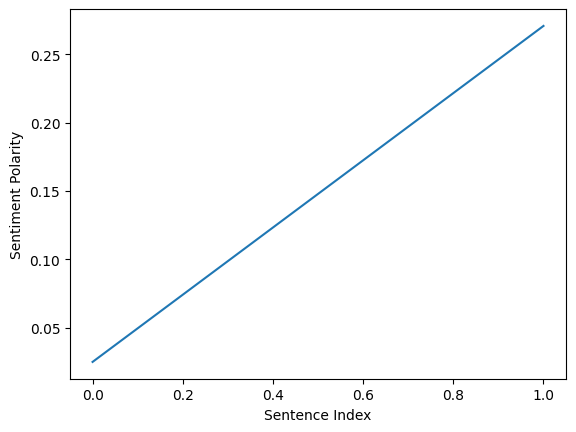

In [37]:
import matplotlib.pyplot as plt
polarities = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
plt.plot(polarities)
plt.xlabel("Sentence Index")
plt.ylabel("Sentiment Polarity")
plt.show()


In [38]:
dates = [ent.text for ent in doc.ents if ent.label_ == "DATE"]
print(dates)



['February 19, 1630']


In [39]:
from nltk.corpus import wordnet
antonyms = {word: [antonym.name() for synset in wordnet.synsets(word) for antonym in synset.lemmas()[0].antonyms()] for word in ["oppression", "invasion"]}
print(antonyms)


{'oppression': [], 'invasion': []}


In [40]:
erroneous_text = "Chhatrapati Shivaji Mahraj was bron at Shivneri Fort..."
corrected_text = TextBlob(erroneous_text).correct()
print(corrected_text)


Chhatrapati Shivaji Mahraj was iron at Shivneri Sort...


In [41]:
svo_triples = [(token.head.text, token.dep_, token.text) for token in doc if token.dep_ in ("nsubj", "dobj")]
print(svo_triples)


[('influenced', 'nsubj', 'who'), ('influenced', 'dobj', 'Shivaji'), ('exhibited', 'nsubj', 'Shivaji'), ('exhibited', 'dobj', 'qualities'), ('forming', 'dobj', 'group'), ('honing', 'dobj', 'skills')]


In [46]:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk import download
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

download('punkt')

# Summarizing using TextBlob
blob = TextBlob(text)
sentences = blob.sentences
key_sentences = sorted(sentences, key=lambda x: x.sentiment.polarity, reverse=True)[:3]
textblob_summary = ' '.join([str(sentence) for sentence in key_sentences])

print("TextBlob Summary:")
print(textblob_summary)

# Summarizing using Sumy
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LsaSummarizer()
sumy_summary = summarizer(parser.document, 3)

print("\nSumy Summary:")
for sentence in sumy_summary:
    print(sentence)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TextBlob Summary:
From an early age, Shivaji exhibited remarkable leadership qualities, forming a group of loyal followers and honing his military skills in the rugged terrain of the Sahyadri mountains... 
Chhatrapati Shivaji Maharaj was born on February 19, 1630, at Shivneri Fort in Maharashtra, to Shahaji Bhonsle, a Maratha general, and Jijabai, who deeply influenced Shivaji with her teachings on dharma, bravery, and justice.

Sumy Summary:
Chhatrapati Shivaji Maharaj was born on February 19, 1630, at Shivneri Fort in Maharashtra, to Shahaji Bhonsle, a Maratha general, and Jijabai, who deeply influenced Shivaji with her teachings on dharma, bravery, and justice.
From an early age, Shivaji exhibited remarkable leadership qualities, forming a group of loyal followers and honing his military skills in the rugged terrain of the Sahyadri mountains...
